In [1]:
# project: p13
# submitter: ccmaloney
# partner: jmaloney3
# hours: ???

In [13]:
import requests
import os
import pandas as pd
from pandas import DataFrame, Series
import sqlite3
import matplotlib

In [14]:
# ensures that font.size setting remains permanent
%matplotlib inline 
pd.set_option('display.max_colwidth', None)
matplotlib.rcParams["font.size"] = 13 # don't use value > 13! Otherwise your y-axis tick labels will be different. 

In [15]:
# Returns True if file was downloaded, False if file already exists
def download(url, filename = None):
    if filename == None:
        filename = os.path.basename(url)
    # We do not download again if the file already exists
    if os.path.exists(filename):
        return False
    
    response = requests.get(url)
    response.raise_for_status()

    f = open(filename, "w", encoding="utf-8")
    f.write(response.text)
    f.close()

    return True

In [16]:
download("https://raw.githubusercontent.com/msyamkumar/cs220-f21-projects/main/p13/QSranking.json")

False

In [17]:
rankings = pd.read_json('QSranking.json')

In [18]:
conn = sqlite3.connect('rankings.db')
rankings.to_sql("rankings", conn, if_exists = "replace", index = False)

# remember to do conn.close() at the end of your notebook or your code may crash when we run test.py.

In [19]:
#Q1: In the year 2020, list the top 10 institutions in Canada which have the highest value in the column `international_students`.

pd.read_sql(
"""
SELECT institution_name, international_students
FROM rankings
WHERE country = "Canada" AND year = "2020"
ORDER BY international_students DESC
LIMIT 10
""", conn)



,institution_name,international_students
0,Mcgill University,96.2
1,University Of Toronto,93.0
2,Simon Fraser University,91.5
3,University Of Waterloo,84.1
4,University Of Alberta,80.8
5,University Of British Columbia,79.3
6,Dalhousie University,73.4
7,Université De Montréal,61.8
8,University Of Calgary,61.2
9,University Of Ottawa,56.7


In [32]:
#Q2: In the year 2019, list the top 10 institutions in the United States which have the highest score of (`academic_reputation + employer_reputation`).


pd.read_sql(
"""
SELECT institution_name, academic_reputation + employer_reputation AS reputation
FROM rankings
WHERE country = "United States" AND year = "2019"
ORDER BY reputation DESC, institution_name ASC
LIMIT 10
""", conn)


,institution_name,reputation
0,Harvard University,200.0
1,Massachusetts Institute Of Technology,200.0
2,Stanford University,200.0
3,"University Of California, Berkeley",199.8
4,Yale University,199.6
5,"University Of California, Los Angeles",199.1
6,Columbia University,197.1
7,Princeton University,196.6
8,University Of Chicago,190.3
9,Cornell University,189.2


In [43]:
#Q3: In the year 2020, list the top 10 countries which have the most institutions.

top_ten = pd.read_sql(
"""
SELECT country, COUNT(institution_name) AS num_of_institutions
FROM rankings
WHERE year = "2020"
GROUP BY country
ORDER BY num_of_institutions DESC, country ASC
LIMIT 10
""", conn)
top_ten
    

,country,num_of_institutions
0,United States,74
1,United Kingdom,45
2,Germany,23
3,Australia,21
4,Canada,14
5,China,14
6,France,14
7,Japan,14
8,Netherlands,13
9,Russia,13


AttributeError: 'AxesSubplot' object has no attribute 'ylabel'

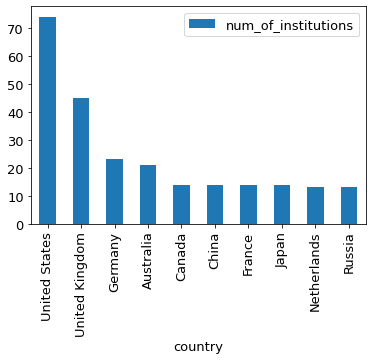

In [49]:
#Q4: In the year 2020, list the top 10 countries which have the most institutions. (answer with a plot)

ax = top_ten.plot.bar(x = 'country', y = 'num_of_institutions')
ax.get_legend().remove()


In [53]:
#Q5: In the year 2019, list the top 10 countries which have the highest total `overall_score`.

top_ten = pd.read_sql(
"""
SELECT country, SUM(overall_score) AS total_score
FROM rankings
WHERE year = "2019"
GROUP BY country
ORDER BY total_score DESC, country ASC
LIMIT 10
""", conn)
top_ten


,country,total_score
0,United States,4298.4
1,United Kingdom,2539.2
2,Germany,1098.2
3,Australia,1093.8
4,Japan,752.9
5,China,743.4
6,Canada,705.3
7,Netherlands,674.9
8,South Korea,612.8
9,France,595.2


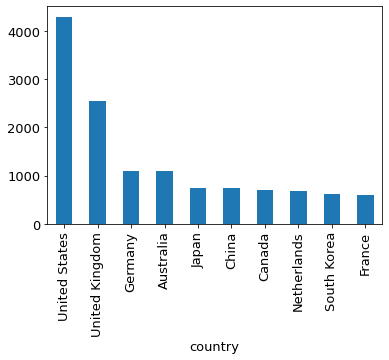

In [55]:
#Q6: In the year 2019, list the top 10 countries which have the highest total `overall_score`. (answer with a plot)

ax = top_ten.plot.bar(x = 'country', y = 'total_score')
ax.get_legend().remove()


In [63]:
#Q7: In the year 2020, list the top 10 institutions in the United States which have the highest score of (`international_faculty + international_students`).

pd.read_sql(
"""
SELECT institution_name, international_faculty + international_students AS international_score
FROM rankings
WHERE year = "2020" AND country = "United States"
ORDER BY international_score DESC, institution_name ASC
LIMIT 10
""", conn)


,institution_name,international_score
0,Massachusetts Institute Of Technology,194.1
1,California Institute Of Technology,186.7
2,Carnegie Mellon University,183.5
3,Rice University,180.4
4,Northeastern University,179.1
5,Stanford University,167.5
6,Cornell University,166.1
7,Purdue University,158.2
8,University Of Rochester,157.9
9,University Of Chicago,151.2


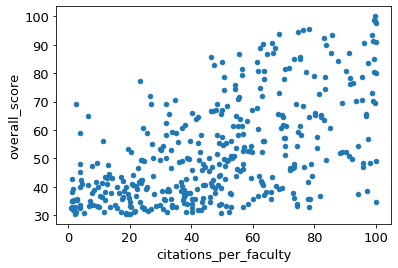

In [67]:
#Q8: In the year 2018, what is the relationship between `citations_per_faculty` and `overall_score`?

ax = pd.read_sql(
"""
SELECT citations_per_faculty, overall_score
FROM rankings
WHERE year = "2018"
""", conn).plot.scatter(x = 'citations_per_faculty', y = 'overall_score')
# ax.get_legend().remove()


In [73]:
#Q9: In the year 2019, what is the correlation between `(citations_per_faculty * international_faculty) / 100` and `overall_score`?

pd.read_sql(
"""
SELECT (citations_per_faculty * international_faculty) / 100 AS x, overall_score AS y
FROM rankings
WHERE year = "2019"
""", conn).corr()["x"].iloc[1]


0.557397228343763

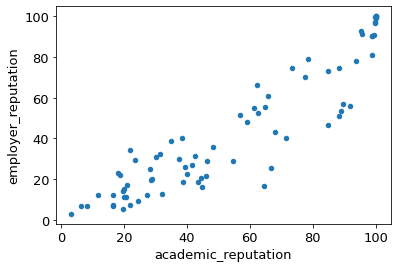

In [77]:
#Q10: In the year 2019, what is the relationship between `academic_reputation` and `employer_reputation` for institutions in United States?

ax = pd.read_sql(
"""
SELECT academic_reputation, employer_reputation
FROM rankings
WHERE year = "2019" AND country = "United States"
""", conn).plot.scatter(x = "academic_reputation", y = "employer_reputation")


In [9]:
conn.close()